In [1]:
import os
import  matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import show_hist # Useful if you wish to plot all hist and GPS target image
from rasterio.mask import mask
#from shapely.geometry import Polygon
from shapely.geometry.point import Point
import shapely
import numpy as np
import csv
#import rioxarray as riox
import fiona
from tools_AA_IR import reading_gps_file, circle_sensor, path_IR, get_tif,get_value_IR

In [2]:
# Ouverture et recupération des positions de Sensors
filename_Sensor_txt = "./traitement_PIREN/sondes_gps_UTM31N_phase1.txt"
Sensor_coord = reading_gps_file(filename_Sensor_txt)
sensor_GPS = Sensor_coord.loc[Sensor_coord['SensorName']==str('S10')]
sensor_GPS["SensorName"]
Sensor_coord # Contient les coord de ts les sensors

,SensorName,x,y
0,S10,523628.71,5366296.81
1,S1,523654.74,5366287.75
2,S9,523692.47,5366276.57
3,S2,523660.22,5366258.91
4,S4,523636.075,5366245.545
5,S5,523641.825,5366220.67
6,S8,523649.33,5366188.02
7,S7,523696.655,5366174.0
8,S6,523694.05,5366209.93


In [9]:
## creation d'un rayon de taille r autour d un Sensor (S10)
list_coord_circle,Shape_to_json,circle_name = circle_sensor(sensor_GPS["SensorName"],Sensor_coord)
list_coord_circle
len(Shape_to_json)


9

In [ ]:
## Chercher si une variable existe ou pas
try: 
    A
except NameError:
        A = 'AHA'
print(A)

In [12]:
#Creat a shape in GeoJSON format in order to be read with rio and 
#serve as mask to crop selected area in the shape
shapes = []
for j in range(len(list_coord_circle)):
    with fiona.open(Shape_to_json[j],'r') as Test_image:
        #print(list(Test_image)) # On va chercher à chopper la propriete Geometry
        shapes.append([feature["geometry"] for feature in Test_image])
print(len(shapes))
#filename_IR = "./traitement_PIREN/sondes_gps_UTM31N_phase1.txt" 

9


In [16]:
#Recupere les noms des IR dans le dossier path, 
#par defaut = './traitement_PIREN/' et permet de 
#choisir n'importe quelle ortho avec son nom 
ls_path_tif = path_IR()
path_tif = get_tif('001',ls_path_tif)
path_tif

'./traitement_PIREN/001_6H55_ortho_UTM31N_IR.tif'

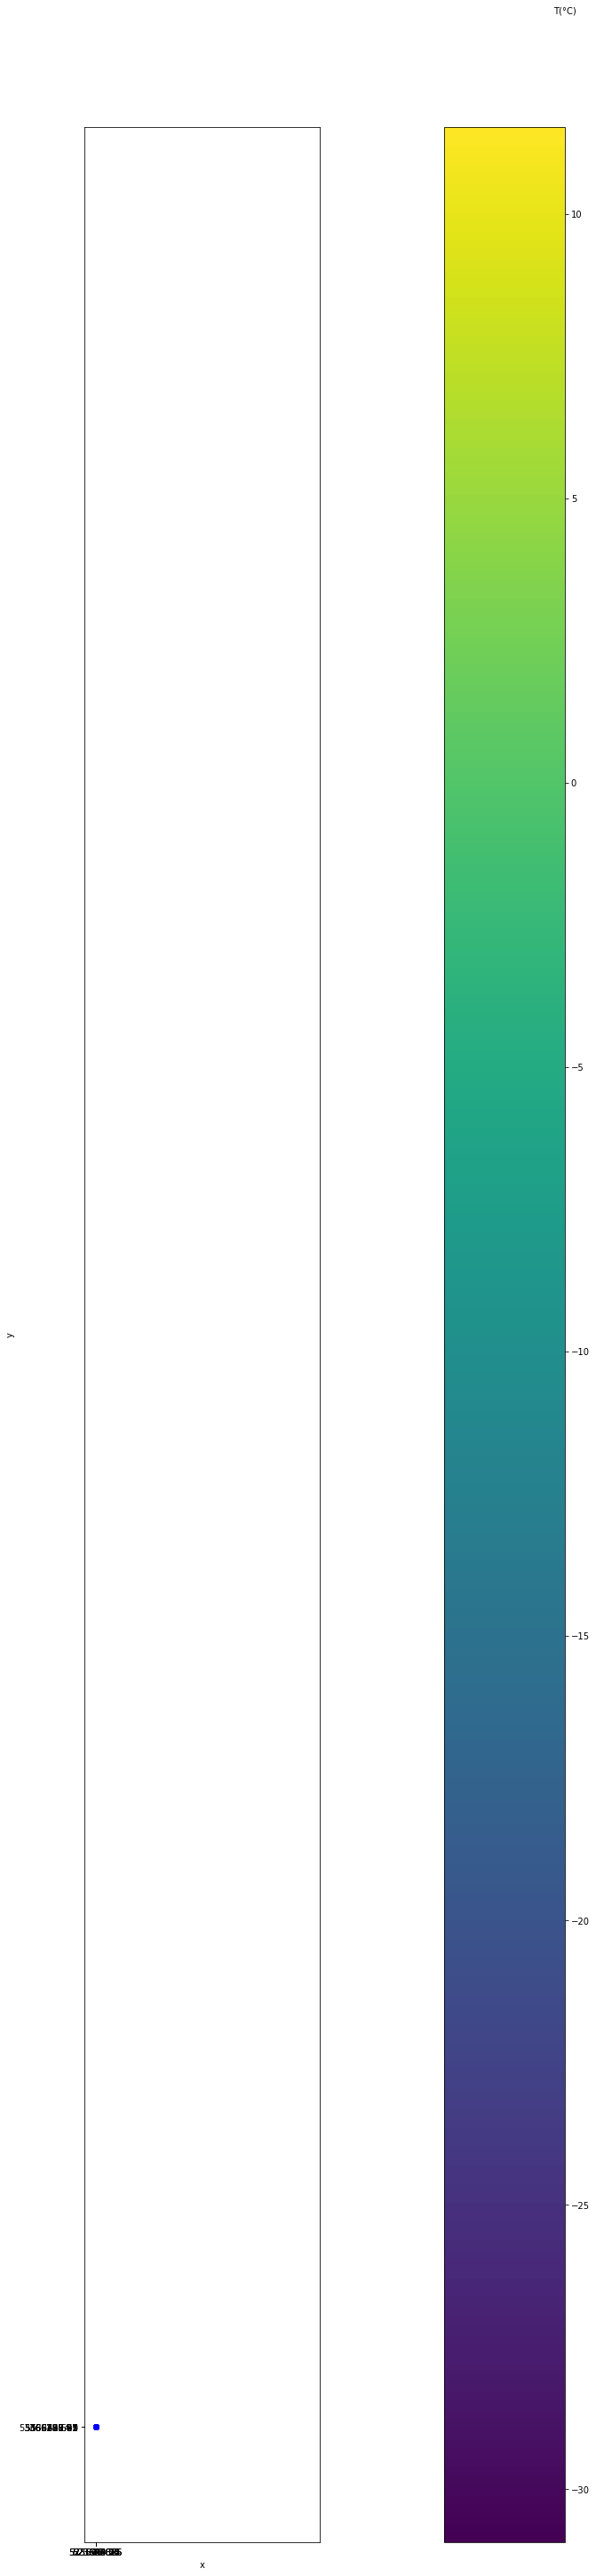

In [17]:
#Rasterio 
IR_src = rio.open(os.path.join(path_tif))
#show((src,1)) # Affiche la premiere bande
#fig1,ax1 = show((src,1),cmap='viridis')
Piren_IR_array=IR_src.read(1) # Lit la bande 1
Piren_Limits = plotting_extent(IR_src) # Limites
Piren_Limits
Piren_res = IR_src.res # resolution
Piren_res
fig_IR,ax_IR=plt.subplots(1,figsize=(50,50))
sub_fig=ax_IR.imshow(Piren_IR_array,extent=Piren_Limits,cmap='viridis')
ax_IR.set_xlabel('x')
ax_IR.set_ylabel('y')
ax_IR.set_label(path_tif)
sub_fig_colorbar=fig_IR.colorbar(sub_fig)
sub_fig_colorbar.set_label('T(°C)', rotation=0, labelpad=-28, y=1.05)

## Plot des coordonnees de la sonde
plt.plot(np.array(Sensor_coord["x"]),np.array(Sensor_coord["y"]),'bo')
## Plot des coordonnees de la sonde
#ax_IR.annotate(str(sensor_GPS["SensorName"]),[np.array(Sensor_coord["x"]),np.array(Sensor_coord["y"])])

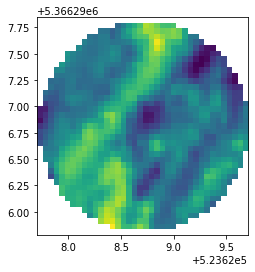

<AxesSubplot:>

In [18]:
out_meta = IR_src.meta
out_image, out_transform = rio.mask.mask(IR_src, shapes[0], crop=True, filled=False)
"""
And update height and width of cropped image with its meta data"""
out_meta.update({"driver": "GTiff",
         "height": out_image.shape[1],
         "width": out_image.shape[2],
         "transform": out_transform})

show(out_image, transform=out_transform)

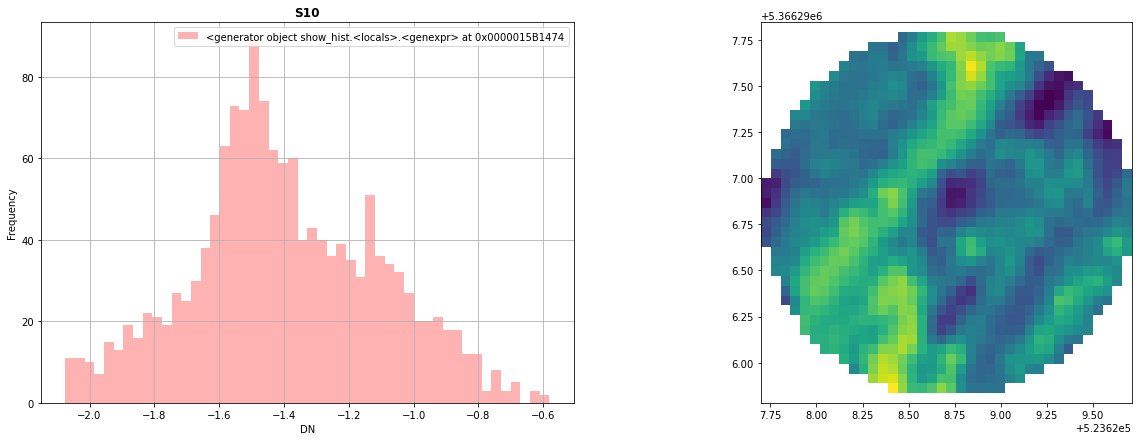

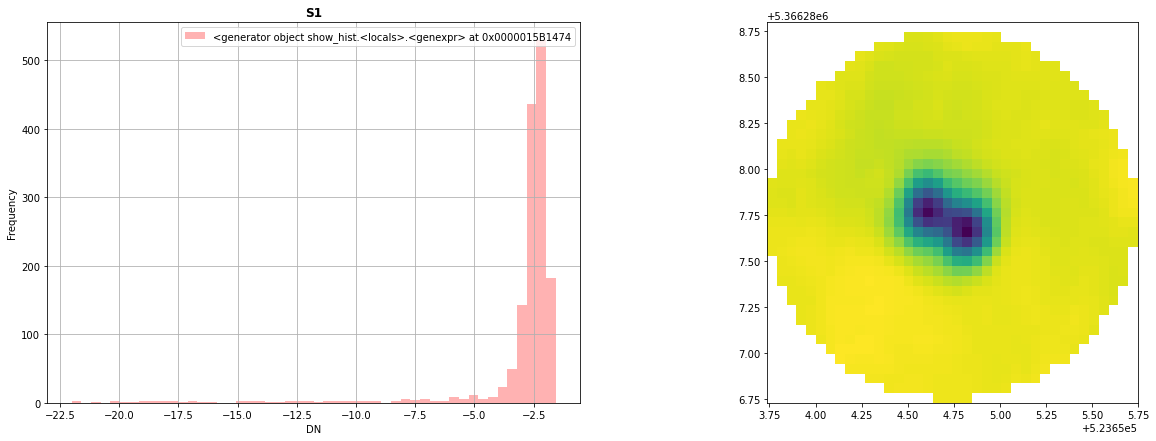

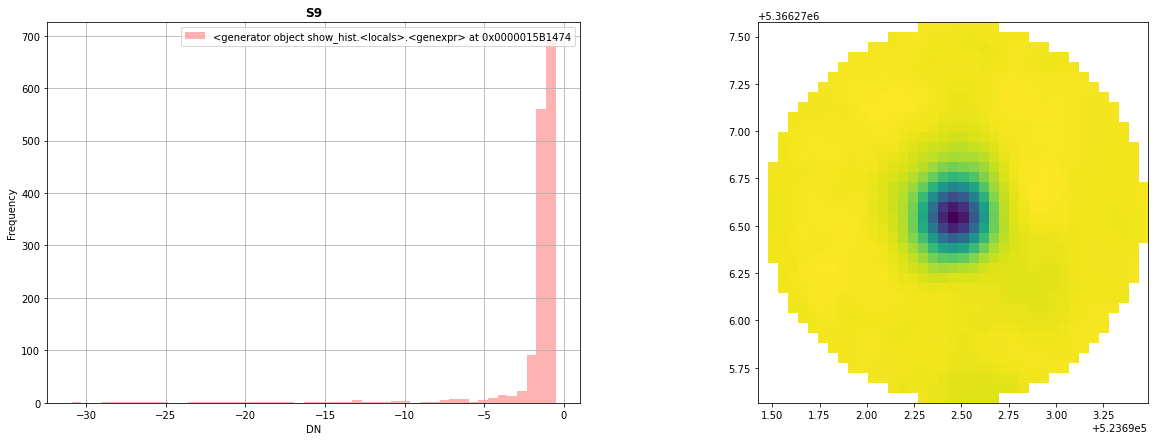

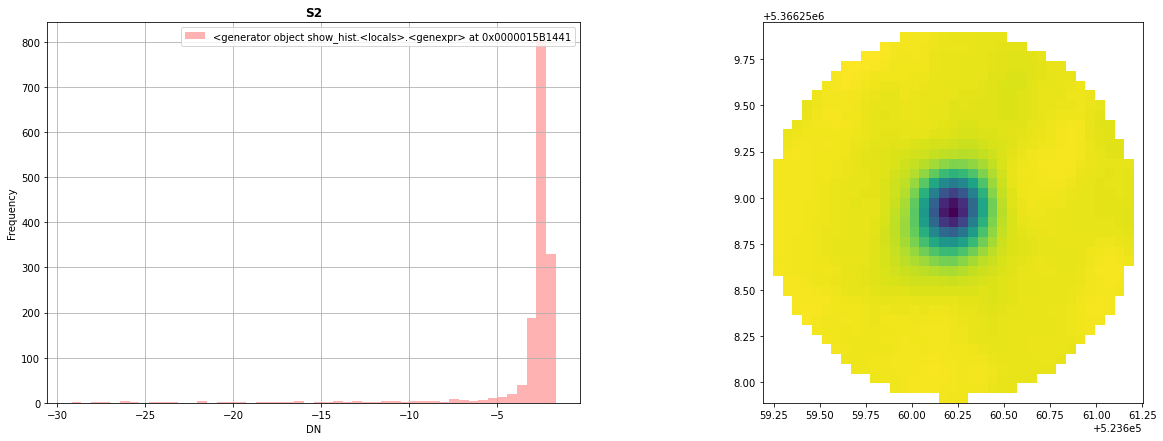

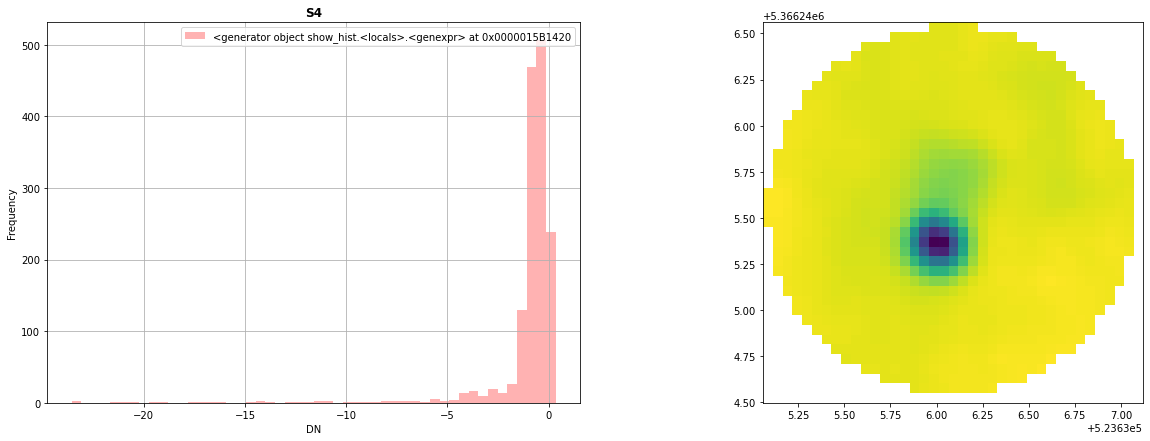

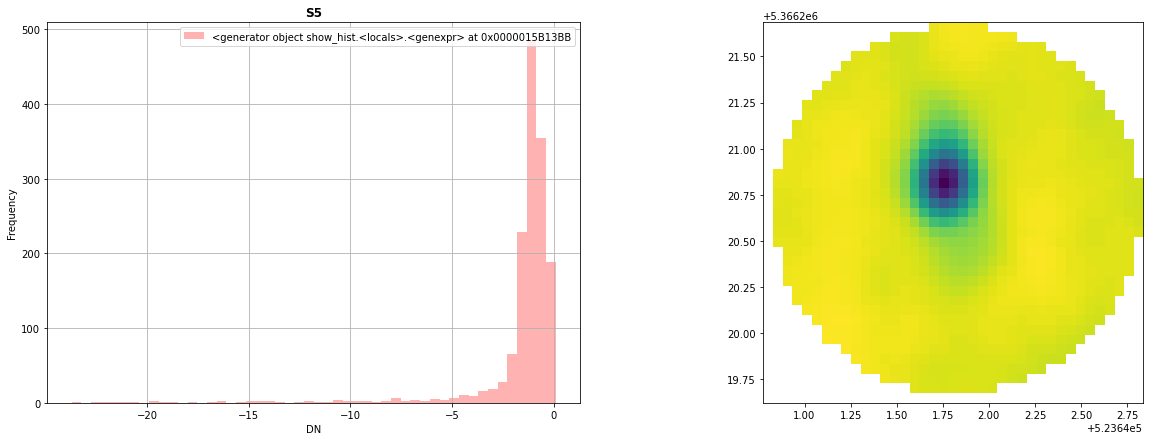

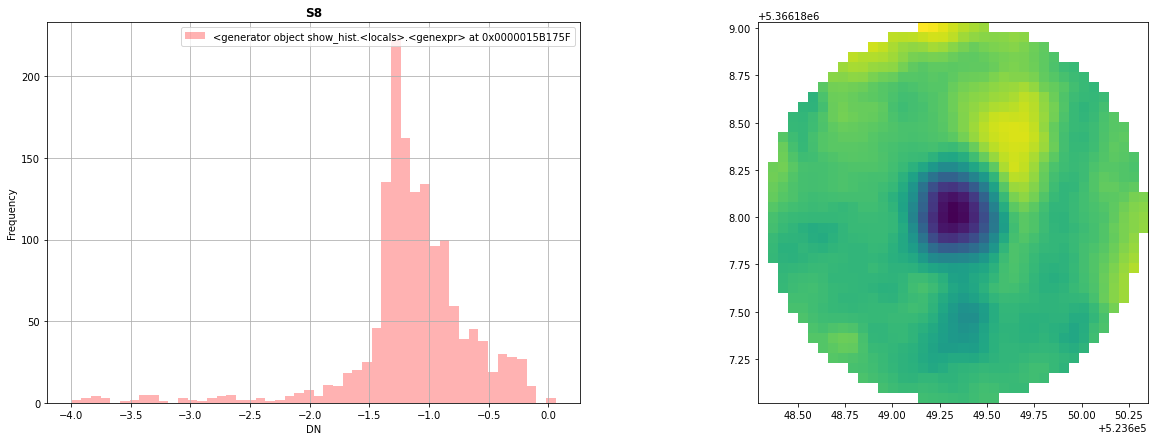

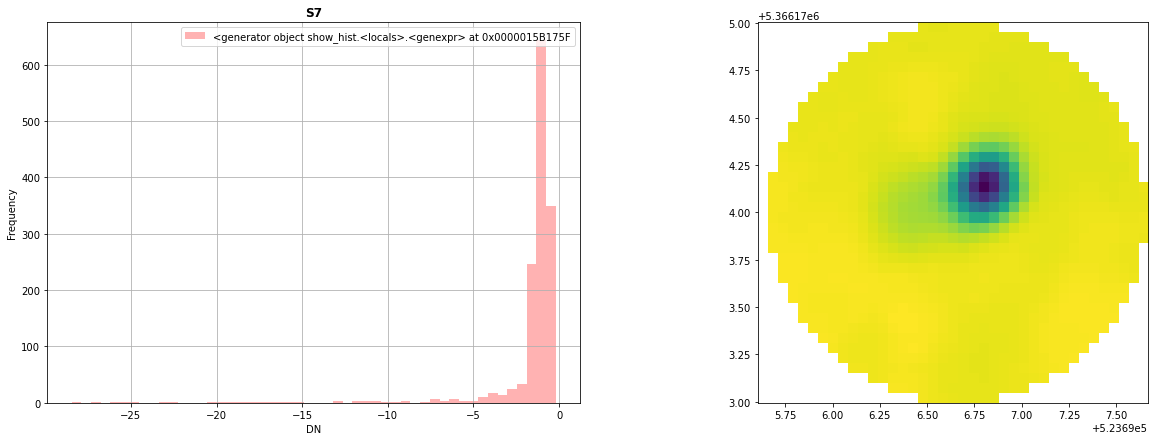

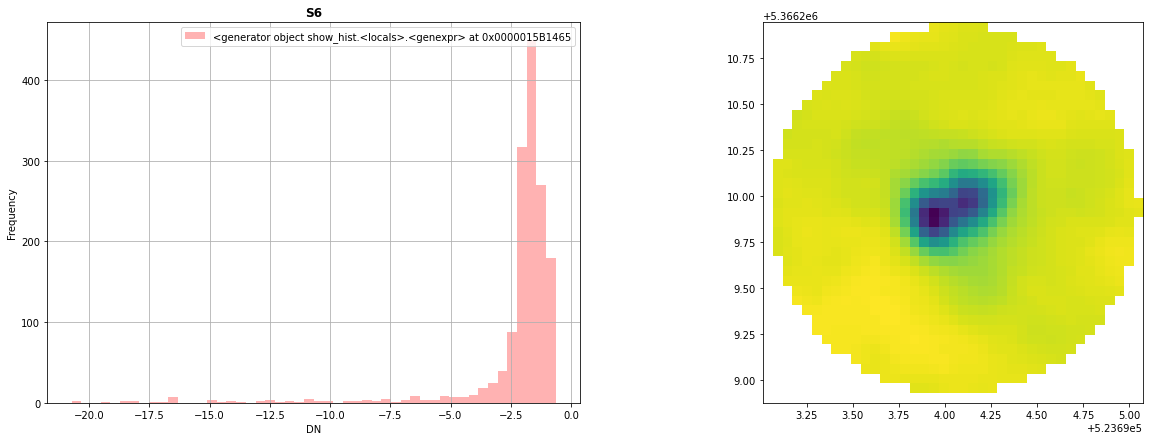

In [38]:

out_meta = IR_src.meta
for k in range(len(list_coord_circle)) :
    out_image, out_transform = rio.mask.mask(IR_src, shapes[k], crop=True, filled=False)
    """
    And update height and width of cropped image with its meta data"""
    out_meta.update({"driver": "GTiff",
             "height": out_image.shape[1],
             "width": out_image.shape[2],
             "transform": out_transform})
    
    fig2,(axhist, axrgb)=plt.subplots(1,2, figsize=(21,7))
    show(out_image, transform=out_transform,ax=axrgb)
    #plt.plot(np.array(Sensor_coord["x"][k]),np.array(Sensor_coord["y"][k]),'bo')
    show_hist(out_image, bins=50, histtype='stepfilled', lw=0.0, stacked=False, ax=axhist, alpha=0.3, title=circle_name[k][k])

In [6]:
coord_value = get_value_IR(Sensor_coord,IR_src)
coord_value

array([0     523628.71
1     523654.74
2     523692.47
3     523660.22
4    523636.075
5    523641.825
6     523649.33
7    523696.655
8     523694.05
Name: x, dtype: object,
       0     5366296.81
1     5366287.75
2     5366276.57
3     5366258.91
4    5366245.545
5     5366220.67
6     5366188.02
7      5366174.0
8     5366209.93
Name: y, dtype: object,
       array([-1.85086758])], dtype=object)

In [30]:
circle_name[1][1]

'S1'

In [35]:
Sensor_coord["x"][0]

'523628.71'

In [9]:
whos

Variable              Type             Data/Info
------------------------------------------------
IR_src                DatasetReader    <open DatasetReader name=<...>_UTM31N_IR.tif' mode='r'>
Piren_IR_array        ndarray          4413x3182: 14042166 elems, type `float64`, 112337328 bytes (107.13322448730469 Mb)
Piren_Limits          tuple            n=4
Piren_res             tuple            n=2
Point                 type             <class 'shapely.geometry.point.Point'>
Sensor_coord          DataFrame          SensorName           x <...>   523694.05   5366209.93
ax_IR                 AxesSubplot      AxesSubplot(0.200606,0.125;0.544394x0.755)
circle_sensor         function         <function circle_sensor at 0x0000029BBA3E4820>
csv                   module           <module 'csv' from 'C:\\U<...>\anaconda3\\lib\\csv.py'>
fig_IR                Figure           Figure(3600x3600)
filename_Sensor_txt   str              ./traitement_PIREN/sondes_gps_UTM31N_phase1.txt
fiona              

In [ ]:
#############################################################################

In [18]:
len_coord = len(Sensor_coord)
value = []
for k in range(0,len_coord) :
    for val in IR_src.sample([(float(Sensor_coord["x"][k]),float(Sensor_coord["y"][k]))]): 
        value.append(val)
    coord_value = np.array([Sensor_coord["x"],Sensor_coord["y"],value])
coord_value.shape

<ipython-input-18-485ca8de6a28>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coord_value = np.array([Sensor_coord["x"],Sensor_coord["y"],value])


(3, 9)

In [13]:
Piren_IR_array.shape
IR_src.tags
aaa = rio.sample.sample_gen(IR_src,([523628.71,5366296.81]),indexes=None,masked=False)
for val in IR_src.sample([(float(Sensor_coord["x"][0]),float(Sensor_coord["y"][0]))]): 
    print(val)

[-17.68754035]


In [85]:
#Recupere les noms des IR dans le dossier path, 
#par defaut = './traitement_PIREN/'
ls_path_tif = path_IR()
ls_path_tif[0][0]
for test_tif in ls_path_tif:
    print(test_tif[0],type(test_tif[0]))
    if test_tif[0].find('003') > 0:
        aaa = test_tif[0]
        break
aaa

./traitement_PIREN/001_6H55_ortho_UTM31N_IR.tif <class 'str'>
./traitement_PIREN/002_7H29_ortho_UTM31N_IR.tif <class 'str'>
./traitement_PIREN/003_8H22_ortho_UTM31N_IR.tif <class 'str'>


'./traitement_PIREN/003_8H22_ortho_UTM31N_IR.tif'

In [7]:
# Ouverture et recupération des positions de Sensors 
Sensor_Name_File_GPS=[]
Sensor_x=[]
Sensor_y=[]
k = 0
with open("./traitement_PIREN/sondes_gps_UTM31N_phase1.txt") as File_GPS:
    csvReader=csv.reader(File_GPS, delimiter='\t')
    for row in csvReader:
        Sensor_Name_File_GPS.append(row[0]) ## colonne nom du fichier
        # str list to float list, for plot option
        Sensor_x.append(float(row[1])) # colonne coordonnees x 
        Sensor_y.append(float(row[2])) # colonne coordonnees y
        print("x =",Sensor_x[k],'  y =',Sensor_y[k])
        k+=1

x = 523628.71   y = 5366296.81
x = 523654.74   y = 5366287.75
x = 523692.47   y = 5366276.57
x = 523660.22   y = 5366258.91
x = 523636.075   y = 5366245.545
x = 523641.825   y = 5366220.67
x = 523649.33   y = 5366188.02
x = 523696.655   y = 5366174.0
x = 523694.05   y = 5366209.93


In [5]:
### Recupere les noms des Sensors dans le dossier path, par defaut = './Data/'
path = './traitement_PIREN/'
ls_path_tif = []
ls_path = os.listdir(path=path)
for tif in ls_path:
    if tif.find('.tif') > 0 :
        ls_path_tif.append([path+tif])

[['./traitement_PIREN/.ipynb_checkpoints']]
[['./traitement_PIREN/.ipynb_checkpoints'], ['./traitement_PIREN/001_6H55_ortho_UTM31N_IR']]
[['./traitement_PIREN/.ipynb_checkpoints'], ['./traitement_PIREN/001_6H55_ortho_UTM31N_IR'], ['./traitement_PIREN/001_6H55_ortho_UTM31N_IR.tif']]
[['./traitement_PIREN/.ipynb_checkpoints'], ['./traitement_PIREN/001_6H55_ortho_UTM31N_IR'], ['./traitement_PIREN/001_6H55_ortho_UTM31N_IR.tif'], ['./traitement_PIREN/002_7H29_ortho_UTM31N_IR']]
[['./traitement_PIREN/.ipynb_checkpoints'], ['./traitement_PIREN/001_6H55_ortho_UTM31N_IR'], ['./traitement_PIREN/001_6H55_ortho_UTM31N_IR.tif'], ['./traitement_PIREN/002_7H29_ortho_UTM31N_IR'], ['./traitement_PIREN/002_7H29_ortho_UTM31N_IR.tif']]
[['./traitement_PIREN/.ipynb_checkpoints'], ['./traitement_PIREN/001_6H55_ortho_UTM31N_IR'], ['./traitement_PIREN/001_6H55_ortho_UTM31N_IR.tif'], ['./traitement_PIREN/002_7H29_ortho_UTM31N_IR'], ['./traitement_PIREN/002_7H29_ortho_UTM31N_IR.tif'], ['./traitement_PIREN/003_8

In [23]:
Sensor_coord =pd.DataFrame(np.array([Sensor_Name_File_GPS,Sensor_x,Sensor_y]).T)
Sensor_coord

,0,1,2
0,S10,523628.71,5366296.81
1,S1,523654.74,5366287.75
2,S9,523692.47,5366276.57
3,S2,523660.22,5366258.91
4,S4,523636.075,5366245.545
5,S5,523641.825,5366220.67
6,S8,523649.33,5366188.02
7,S7,523696.655,5366174.0
8,S6,523694.05,5366209.93


In [25]:
## creation d'un rayon de taille r autour d une Sensor (S10)
list_coord_circle = []
Shape_to_json=[]
circle_name = []

len_sensor = len(Sensor_coord['SensorName'])
for SensorName in Sensor_coord['SensorName'] :
    sensor_GPS = Sensor_coord.loc[Sensor_coord['SensorName']==str(SensorName)]
    center = Point(sensor_GPS["x"],sensor_GPS["y"])
    circle = center.buffer(1)
    #Val de chaque extremitees du cercle
    x_circle,y_circle = circle.exterior.xy
    list_coord_circle.append([np.array(x_circle),np.array(y_circle)])
    # Transfo des donnees en Geoseries : 
    #Json -> https://fr.wikipedia.org/wiki/JavaScript_Object_Notation
    # Format qui contient toutes les proprietes + points ext du cercle
    Shape_to_json.append(gpd.GeoSeries([circle]).to_json())
    circle_name.append(sensor_GPS['SensorName'])
    list_coord_circle

[[array([523629.71      , 523629.70518473, 523629.69078528, 523629.66694034,
         523629.63387953, 523629.59192126, 523629.54146961, 523629.48301045,
         523629.41710678, 523629.34439328, 523629.26557023, 523629.18139674,
         523629.09268343, 523629.00028468, 523628.90509032, 523628.80801714,
         523628.71      , 523628.61198286, 523628.51490968, 523628.41971532,
         523628.32731657, 523628.23860326, 523628.15442977, 523628.07560672,
         523628.00289322, 523627.93698955, 523627.87853039, 523627.82807874,
         523627.78612047, 523627.75305966, 523627.72921472, 523627.71481527,
         523627.71      , 523627.71481527, 523627.72921472, 523627.75305966,
         523627.78612047, 523627.82807874, 523627.87853039, 523627.93698955,
         523628.00289322, 523628.07560672, 523628.15442977, 523628.23860326,
         523628.32731657, 523628.41971532, 523628.51490968, 523628.61198286,
         523628.71      , 523628.80801714, 523628.90509032, 523629.00028468,

In [41]:
plot_test = gpd.GeoSeries([circle])
plot_test.head()

0    POLYGON ((523629.710 5366296.810, 523629.705 5...
dtype: geometry